In [138]:
import numpy as np
import copy
from scipy.interpolate import bisplev
import matplotlib.pyplot as plt

# Parámetros de entrada

In [230]:
Density = np.array([8.529762443780424e+17, 1.166678028854428e+18, 1.628554083661188e+18, 2.036659383130584e+18, 2.227688922516581e+18, 2.41467000241316e+18,  
  2.471536926117491e+18, 2.474587257751732e+18, 2.53455740085265e+18, 2.78766324060693e+18, 3.052330238189064e+18, 3.376314044293282e+18,  
  3.721903043739879e+18, 4.085641866071011e+18, 4.490563821868612e+18, 4.900116555792079e+18, 5.328639951013514e+18, 5.763411516283688e+18,  
  6.258668445493425e+18, 6.884897529217857e+18, 7.532562105659867e+18, 8.245540842577419e+18, 8.978140610546499e+18, 9.764932881845998e+18,  
  1.064510309244566e+19, 1.154562457754335e+19, 1.246612004855399e+19, 1.339219824189277e+19, 1.438086279128058e+19, 1.546895051172811e+19,  
  1.658441456492423e+19, 1.77591632810782e+19, 1.894972647814284e+19, 2.012007708775305e+19, 2.125441644021092e+19, 2.23744660734298e+19,  
  2.335807233084692e+19, 2.430258503689977e+19, 2.513778011485848e+19, 2.58486679791199e+19, 2.650697354927826e+19, 2.696688810884831e+19,  
  2.736885360390719e+19, 2.767755514734248e+19, 2.78985161142427e+19, 2.807845973719836e+19, 2.821134945302991e+19, 2.832900993717576e+19,  
  2.847840626093951e+19, 2.86658701262413e+19, 2.888495514205416e+19, 2.925228520795812e+19, 2.968227027287051e+19, 3.02519331399673e+19,  
  3.094773278270731e+19, 3.173437902821304e+19, 3.27048806536534e+19, 3.376853862466836e+19, 3.492394055726716e+19, 3.615236348329313e+19,  
  3.742302914930352e+19, 3.869119468231002e+19, 3.99577748280879e+19, 4.114727167111908e+19, 4.226633624201875e+19, 4.331837908428376e+19,  
  4.426173988189363e+19, 4.512142801431744e+19, 4.597899743671135e+19, 4.684002055130495e+19, 4.77702241322341e+19, 4.893563197939785e+19,  
  5.033180439327269e+19, 5.337742052312856e+19, 5.791871199181192e+19, 6.391859573325524e+19, 7.153223284268655e+19, 8.085473007409258e+19,  
  8.79982692019479e+19, 9.307127112966591e+19, 9.830697941199636e+19, 1.071174126556021e+20, 1.202394332201221e+20, 1.309072041363556e+20,  
  1.39150859397991e+20, 1.452980223823099e+20, 1.497733580469721e+20, 1.520364062762668e+20, 1.542557778545155e+20, 1.564299413692613e+20,  
  1.58574779016409e+20, 1.60707354245483e+20, 1.628226997976754e+20, 1.648657845199277e+20, 1.668274043353586e+20, 1.687353998163313e+20,  
  1.706122383620804e+20, 1.724443928750773e+20, 1.7420658108391e+20, 1.758827826988874e+20, 1.774878239179623e+20, 1.790223412895964e+20,  
  1.804526508166777e+20, 1.817531365519266e+20, 1.828690366046071e+20, 1.839198092155461e+20, 1.849705773749886e+20, 1.860213579120357e+20,  
  1.870721252762004e+20, 1.881229141639989e+20, 1.89173700285943e+20, 1.902244750275706e+20, 1.912752425715314e+20, 1.923260205225596e+20,  
  1.933768010378759e+20, 1.943999010430651e+20, 1.953612264256265e+20, 1.962303432238066e+20, 1.970064594125254e+20, 1.975424922456411e+20,  
  1.980360523630629e+20, 1.985296069031725e+20, 1.990231618600746e+20, 1.995167168038527e+20, 2.000102843650515e+20, 2.005032831018369e+20,  
  2.00994699819287e+20, 2.014758731108977e+20, 2.019153318855567e+20, 2.021724053956685e+20, 2.024151617578905e+20, 2.026579244559852e+20,  
  2.029006934973297e+20, 2.03143456894858e+20, 2.033862270378502e+20, 2.036289872884774e+20, 2.038717469980017e+20, 2.041145120381283e+20,  
  2.04357282187226e+20, 2.046000388646562e+20, 2.048428113435099e+20, 2.050855777300937e+20, 2.053283381187215e+20, 2.055711077294206e+20,  
  2.05813856787738e+20])
Te = np.array([9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207, 9.34678840637207,  
  9.353203155001086, 9.373764910512076, 9.396642210011589, 9.550901584045615, 9.744629809912034, 10.01682774035412,  
  10.41942009712586, 10.85043167558095, 11.30267208320391, 11.76084605210844, 12.24974725618487, 12.78601164914653,  
  13.33531789914654, 13.89692424116531, 14.46181227367745, 15.00772384603196, 15.52499085599722, 16.03142479493324,  
  16.46155264211707, 16.86981647052882, 17.22322479786068, 17.51513957277031, 17.7805713299966, 17.92301563922854,  
  18.02953533334086, 18.0895014881993, 18.10810470581055, 18.10810470581055, 18.10810470581055, 18.10810470581055,  
  18.10810470581055, 18.10810470581055, 18.1091793529839, 18.12300873972003, 18.14222841093713, 18.20386173910835,  
  18.30656848699226, 18.44081540916582, 18.65152197654864, 18.90097003801679, 19.20510905753286, 19.55525068296369,  
  19.93960698368101, 20.3674885456835, 20.82293073944747, 21.29202885203345, 21.77093977995033, 22.25529679264035,  
  22.73730356825286, 23.21750177986635, 23.71196117904358, 24.21942507741451, 24.75868421143798, 25.38127615479738,  
  26.08562981408275, 26.98923976005779, 28.07260860790412, 29.32705803311105, 30.76285644939662, 32.39069096405154,  
  34.31278264239886, 36.50471401412148, 39.01950698141633, 41.95052863465907, 45.38358121853592, 48.89483031320226,  
  52.47814567891719, 56.13221024260849, 59.85522399943026, 63.66947087443037, 67.30889626515891, 70.76738782792263,  
  74.12886042388425, 77.48437862513902, 80.83153765158241, 84.14353032793755, 87.41589319964561, 90.66862540859704,  
  93.91925609236498, 97.16686839705258, 100.4097654770221, 103.6468601572802, 106.8813194176123, 110.1153191780616,  
  113.3486302592922, 116.5810976805658, 119.8123560740639, 123.0431883947535, 126.2740210794686, 129.5048540076918,  
  132.7357154141247, 135.9665968426143, 139.1974716126723, 142.4283277992856, 145.6591656433962, 148.8900049012087,  
  152.1208329717689, 155.3516514221974, 158.5824483330587, 161.8132068782287, 165.0439107844788, 168.2745193646292,  
  171.5051044332725, 174.7356847540415, 177.9662626015533, 181.1968297890534, 184.4274078516455, 187.6579881699361,  
  190.8885684376991, 194.1191480988735, 197.3497289582486, 200.5802971068594, 203.8108726892539, 207.041468607837,  
  210.2720826893039, 213.5026878610286, 216.7332803796783, 219.9638631844349, 223.1944373076061, 226.4250054964035,  
  229.6555730069151, 232.8861521772006, 236.1167232480625, 239.3472975044651, 242.5778734442176, 245.8084411693878,  
  249.0390220287629])		

In [ ]:
Density.min(),Density.max(),Density.shape

In [ ]:
Te.min(),Te.max(),Te.shape

In [ ]:
from scipy.io import readsav

filename = 'jh_bscoef.dat'  # Nombre del archivo
idl_data = readsav(filename)
print("Datos cargados correctamente desde el archivo IDL.")

In [ ]:
idl_data.keys()

In [142]:
DKnot = copy.copy(idl_data['dknot'])
TKnot = copy.copy(idl_data['tknot'])
order = copy.copy(idl_data['order'])
LogR_BSCoef = copy.copy(idl_data['LogR_BSCoef'])
LogS_BSCoef = copy.copy(idl_data['logs_bscoef'])
LogAlpha_BSCoef = copy.copy(idl_data['logalpha_bscoef'])
A_Balmer = copy.copy(idl_data['a_balmer'])
A_Lyman  = copy.copy(idl_data['a_lyman'])

In [143]:
# Convertir los datos a un tipo de datos específico de Python
DKnot = DKnot.astype(np.float32)   # Convierte a float64 por defecto
TKnot = TKnot.astype(np.float32)
order = order.astype(np.int32)     # Convierte a int32 por defecto
LogR_BSCoef = LogR_BSCoef.astype(np.float32)
LogS_BSCoef = LogS_BSCoef.astype(np.float32)
LogAlpha_BSCoef = LogAlpha_BSCoef.astype(np.float32)
A_Balmer = A_Balmer.astype(np.float32)
A_Lyman = A_Lyman.astype(np.float32)


In [144]:
if len(Density)!=len(Te):
    print('Number of elements of Density and Te are different!')

In [145]:
Result = np.full_like(Density, 1.0e32) # This line, takes the dimensions of Density and fill the new array Result with all its values as 1e32
LDensity = np.log(Density)
LTe = np.log(Te)

In [ ]:
dk_new_len = len(DKnot)-order
tk_new_len = len(TKnot)-order

In [182]:
No_null=0
if No_null:
    LDensity = np.clip(LDensity,min(DKnot),max(DKnot))
    LTe      = np.clip(LTe     ,min(TKnot),max(TKnot))
    count    = len(LDensity)
    ok       = np.arange(count)
else:
    ok = np.where(np.logical_and.reduce((LDensity <= max(DKnot),
                                         LDensity >= min(DKnot),
                                         LTe      <= max(TKnot),
                                         LTe      >= min(TKnot))))[0]
    count = len(ok)
# if count > 0:
#     for i in ok: 
#         Result[i]=(bisplev(LDensity[i],LTe[i],(DKnot,TKnot,LogS_BSCoef,3,3),0,0))
        # Result[i]=(bisplev(LDensity[i],LTe[i],(DKnot[:5],TKnot,LogS_BSCoef[0:55],4,3),0,0))
   

In [ ]:
DKnot

In [ ]:
TKnot

In [129]:
from scipy.interpolate import bisplrep

In [ ]:
Dknot_subset = DKnot[2:-2]  # Longitud 7
Tknot_subset = TKnot[2:-2]  # Longitud 11
# Desplazando los elementos iniciales una cantidad infinitesimal
Dknot_subset[0]  -= 1e-5
Dknot_subset[-1] += 1e-5 
print(Dknot_subset)
Tknot_subset[0]  -= 1e-5
Tknot_subset[-1] += 1e-5 
print(Tknot_subset)

Dk_weights = np.ones_like(Dknot_subset)
Dk_weights[ 0] = 0.5  # Menor peso al primer valor
Dk_weights[-1] = 0.5  # Menor peso al último valor

Tk_weights = np.ones_like(Tknot_subset)
Tk_weights[ 0] = 0.5  # Menor peso al primer valor
Tk_weights[-1] = 0.5  # Menor peso al último valor
D_wgrid, T_wgrid = np.meshgrid(Dk_weights, Tk_weights, indexing="ij")
D_fwgrid = D_wgrid.flatten()
T_fwgrid = T_wgrid.flatten()
# # Crear una cuadrícula 2D para las coordenadas
D_grid, T_grid = np.meshgrid(Dknot_subset, Tknot_subset, indexing="ij")

# # Aplanar las coordenadas y los valores de la función
D_flat = D_grid.flatten()
T_flat = T_grid.flatten()
Bs_flat = LogS_BSCoef.flatten()  # Asegurar que los valores también estén aplanados

print(len(D_fwgrid), '\n',len(T_fwgrid))

In [ ]:
w_ones = 0.1*np.ones((7,11))
w_ones_int = np.ones((5,9))

w_ones[1:-1,1:-1] = copy.copy(w_ones_int)
w_ones


In [192]:
tck = bisplrep(D_flat, T_flat, Bs_flat, kx=3, ky=3, w=w_ones.flatten(),s=200)

In [ ]:
tck

In [193]:
if count > 0:
    for i in ok: 
        Result[i]=(bisplev(LDensity[i],LTe[i],tck,0,0))

In [194]:
# Crear las mallas para las grillas
Dknot_grid, Tknot_grid = np.meshgrid(Dknot_subset, Tknot_subset)
LDensity_grid, LTe_grid = np.meshgrid(LDensity, LTe)

# Matrices de ejemplo (sustituir con LogS_BSCoef y Result)
# LogS_BSCoef = np.sin(Dknot_grid) * np.cos(Tknot_grid)  # Sustituir por tus datos reales
# Result = np.sin(LDensity_grid) * np.cos(LTe_grid)  # Sustituir por tus datos reales

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 6))

# Superficie 1: LogS_BSCoef
ax1 = fig.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(Dknot_grid, Tknot_grid, LogS_BSCoef.reshape((11,7)), cmap='viridis', alpha=0.8)
# ax1.plot_wireframe(Dknot_grid, Tknot_grid, reshaped_LogS_BSCoef)
ax1.set_title('LogS_BSCoef')
ax1.set_xlabel('Dknot')
ax1.set_ylabel('Tknot')
ax1.set_zlabel('Values')
# fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)
ax1.scatter(Dknot_grid, Tknot_grid, LogS_BSCoef.reshape((11,7)), color='g', s=2**2,alpha=0.5)
ax1.scatter(LDensity, LTe, Result, color='red', s=1**2,alpha=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [111]:
plt.scatter(LDensity,LTe,c=Result,s=2**2)
plt.show()

In [112]:
dk_new_len = len(DKnot)-order
tk_new_len = len(TKnot)-order

new_DKnot = copy.copy(DKnot[2:-2])
new_TKnot = copy.copy(TKnot[2:-2])

reshaped_LogS_BSCoef = LogS_BSCoef.reshape((tk_new_len,dk_new_len))

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(LDensity, LTe, Result, color='red', s=1**2,alpha=0.5)

In [ ]:
break

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos de entrada
# Dknot = np.linspace(0, 10, 50)  # Ejemplo, sustituir con tus datos reales
# Tknot = np.linspace(0, 5, 30)   # Ejemplo, sustituir con tus datos reales
# LDensity = np.linspace(0, 10, 100)  # Ejemplo, sustituir con tus datos reales
# LTe = np.linspace(0, 5, 60)        # Ejemplo, sustituir con tus datos reales

# Crear las mallas para las grillas
Dknot_grid, Tknot_grid = np.meshgrid(new_DKnot, new_TKnot)
LDensity_grid, LTe_grid = np.meshgrid(LDensity, LTe)

# Matrices de ejemplo (sustituir con LogS_BSCoef y Result)
# LogS_BSCoef = np.sin(Dknot_grid) * np.cos(Tknot_grid)  # Sustituir por tus datos reales
# Result = np.sin(LDensity_grid) * np.cos(LTe_grid)  # Sustituir por tus datos reales

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 6))

# Superficie 1: LogS_BSCoef
ax1 = fig.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(Dknot_grid, Tknot_grid, reshaped_LogS_BSCoef, cmap='viridis', alpha=0.8)
# ax1.plot_wireframe(Dknot_grid, Tknot_grid, reshaped_LogS_BSCoef)
ax1.set_title('LogS_BSCoef')
ax1.set_xlabel('Dknot')
ax1.set_ylabel('Tknot')
ax1.set_zlabel('Values')
# fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)
ax1.scatter(Dknot_grid, Tknot_grid, reshaped_LogS_BSCoef, color='g', s=2**2,alpha=0.5)
ax1.scatter(LDensity, LTe, Result, color='red', s=1**2,alpha=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos de entrada
# Dknot = np.linspace(0, 10, 50)  # Ejemplo, sustituir con tus datos reales
# Tknot = np.linspace(0, 5, 30)   # Ejemplo, sustituir con tus datos reales
# LDensity = np.linspace(0, 10, 100)  # Ejemplo, sustituir con tus datos reales
# LTe = np.linspace(0, 5, 60)        # Ejemplo, sustituir con tus datos reales

# Crear las mallas para las grillas
Dknot_grid, Tknot_grid = np.meshgrid(Dknot, Tknot)
LDensity_grid, LTe_grid = np.meshgrid(LDensity, LTe)

# Matrices de ejemplo (sustituir con LogS_BSCoef y Result)
LogS_BSCoef = np.sin(Dknot_grid) * np.cos(Tknot_grid)  # Sustituir por tus datos reales
Result = np.sin(LDensity_grid) * np.cos(LTe_grid)  # Sustituir por tus datos reales

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie 1: LogS_BSCoef
surf1 = ax.plot_surface(Dknot_grid, Tknot_grid, LogS_BSCoef, cmap='viridis', alpha=0.1)

# Superficie 2: Result
surf2 = ax.plot_surface(LDensity_grid, LTe_grid, Result, cmap='plasma', alpha=0.1)

# Añadir título y etiquetas
ax.set_title('Comparación de LogS_BSCoef y Result')
ax.set_xlabel('Dknot / LDensity')
ax.set_ylabel('Tknot / LTe')
ax.set_zlabel('Values')

# Añadir barra de color
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=10, label='LogS_BSCoef')
fig.colorbar(surf2, ax=ax, shrink=0.5, aspect=10, label='Result')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos de entrada
Dknot = np.linspace(0, 10, 50)  # Ejemplo, sustituir con tus datos reales
Tknot = np.linspace(0, 5, 30)   # Ejemplo, sustituir con tus datos reales
LDensity = np.linspace(0, 10, 100)  # Ejemplo, sustituir con tus datos reales
LTe = np.linspace(0, 5, 60)        # Ejemplo, sustituir con tus datos reales

# Crear las mallas para las grillas
Dknot_grid, Tknot_grid = np.meshgrid(Dknot, Tknot)
LDensity_grid, LTe_grid = np.meshgrid(LDensity, LTe)

# Matrices de ejemplo (sustituir con LogS_BSCoef y Result)
LogS_BSCoef = np.sin(Dknot_grid) * np.cos(Tknot_grid)  # Sustituir por tus datos reales
Result = np.sin(LDensity_grid) * np.cos(LTe_grid)  # Sustituir por tus datos reales

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Enmallado 1: LogS_BSCoef
ax.plot_wireframe(Dknot_grid, Tknot_grid, LogS_BSCoef,color='red', alpha=0.5)
ax.scatter(Dknot_grid, Tknot_grid, LogS_BSCoef, color='red', s=1**2,alpha=0.5)
# ax.plot(Dknot_grid, Tknot_grid, LogS_BSCoef,'o',color='g')
# Enmallado 2: Result
ax.plot_wireframe(LDensity_grid, LTe_grid, Result, color='b',alpha=0.5)
ax.scatter(LDensity_grid, LTe_grid, Result, color='b', s=1**2, alpha=0.5)
# ax.plot(LDensity_grid, LTe_grid, Result,'o',color='r')

# Añadir título y etiquetas
ax.set_title('Enmallado de LogS_BSCoef y Result')
ax.set_xlabel('Dknot / LDensity')
ax.set_ylabel('Tknot / LTe')
ax.set_zlabel('Values')
# ax.view_init(elev=30,azim=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
break

# Intentos anteriores

In [199]:
R = np.zeros((7, 11, 2, 5), dtype=np.float64)
DENS=np.array([1.E10,1.E11,1.E12,1.E13,1.E14,1.E15,1.E16])
TEMP=np.array([.345,.69,1.38,2.76,5.52,11.0,22.1,44.1,88.0,176.5,706.])
R[:, :, 0, 0] = np.array([7.6E-6,1.1E-5,1.9E-5,4.9E-5,2.4E-4,2.2E-3,1.8e-2,
                        1.5E-3,1.8E-3,2.5E-3,4.5E-3,1.3E-2,7.1E-2,3.7e-1,
                        2.6E-2,2.9E-2,3.5E-2,4.9E-2,9.6E-2,3.2E-1,7.8e-1,
                        1.3E-1,1.4E-1,1.5E-1,1.9E-1,2.8E-1,6.1E-1,9.2e-1,
                        3.6E-1,3.7E-1,3.8E-1,4.2E-1,5.2E-1,8.0E-1,9.6e-1,
                        6.9E-1,6.9E-1,7.0E-1,7.3E-1,7.9E-1,9.2E-1,9.8e-1,
                        1.1,   1.1,   1.1,   1.1,   1.1,   1.0,   1.0,
                        1.5,   1.5,   1.5,   1.5,   1.4,   1.1,   1.0,
                        2.0,   2.0,   1.9,   1.9,   1.7,   1.3,   1.0,
                        2.4,   2.4,   2.4,   2.3,   2.1,   1.4,   1.1,
                        3.4,   3.4,   3.3,   3.2,   2.9,   2.0,   1.2]).reshape(7, 11)
R[:, :, 1, 0] = np.array([2.5E-7,2.5E-6,2.5E-5,2.5E-4,2.5E-3,2.4E-2,2.0e-1,
                        1.9E-7,1.9E-6,1.9E-5,1.9E-4,1.9E-3,1.8E-2,1.0e-1,
                        1.6E-7,1.6E-6,1.6E-5,1.6E-4,1.5E-3,1.1E-2,3.2e-2,
                        1.5E-7,1.5E-6,1.5E-5,1.5E-4,1.3E-3,7.2E-3,1.3e-2,
                        1.6E-7,1.6E-6,1.6E-5,1.5E-4,1.3E-3,5.4E-3,8.0e-3,
                        1.8E-7,1.8E-6,1.8E-5,1.7E-4,1.4E-3,5.1E-3,7.0e-3,
                        2.1E-7,2.1E-6,2.1E-5,2.0E-4,1.6E-3,5.6E-3,7.5e-3,
                        2.3E-7,2.3E-6,2.3E-5,2.2E-4,1.7E-3,6.3E-3,8.7e-3,
                        2.3E-7,2.3E-6,2.3E-5,2.2E-4,1.8E-3,7.0E-3,1.0e-2,
                        2.2e-7,2.2e-6,2.1e-5,2.1e-4,1.7e-3,7.4e-3,1.1e-2,
                        1.6E-7,1.6E-6,1.6E-5,1.6E-4,1.4E-3,7.2E-3,1.3e-2]).reshape(7,11)
R[:, :, 0, 1] = np.array([2.2E-3,3.1E-3,6.0E-3,2.2E-2,1.3E-1,3.5E-1,4.2e-1,
                        2.6E-2,3.3E-2,5.0E-2,1.2E-1,4.3E-1,7.2E-1,8.5e-1,
                        1.1E-1,1.3E-1,1.6E-1,3.0E-1,6.8E-1,8.9E-1,9.7e-1,
                        2.7E-1,2.9E-1,3.4E-1,5.0E-1,8.2E-1,9.5E-1,9.9e-1,
                        4.8E-1,5.0E-1,5.4E-1,6.8E-1,9.0E-1,9.8E-1,1.0,
                        7.3E-1,7.4E-1,7.7E-1,8.5E-1,9.5E-1,9.9E-1,1.0,
                        1.0,1.0,1.0,1.0,1.0,1.0,1.0,
                        1.3,1.3,1.3,1.2,1.1,1.0,1.0,
                        1.6,1.6,1.5,1.4,1.1,1.0,1.0,
                        1.9,1.9,1.8,1.6,1.2,1.1,1.0,
                        2.5,2.4,2.4,2.1,1.5,1.1,1.0]).reshape(7,11)
R[:,:,1,1] = np.array([1.0E-7,1.0E-6,1.0E-5,1.0E-4,1.1E-3,1.3E-2,1.1e-1,
                        8.2E-8,8.1E-7,8.0E-6,7.7E-5,6.1E-4,4.5E-3,4.2e-2,
                        7.1E-8,7.0E-7,6.8E-6,5.9E-5,3.3E-4,1.6E-3,4.1e-3,
                        6.8E-8,6.7E-7,6.3E-6,4.9E-5,2.1E-4,7.3E-4,1.2e-3,
                        7.2E-8,7.0E-7,6.5E-6,4.7E-5,1.8E-4,4.9E-4,6.8e-4,
                        8.1E-8,7.8E-7,7.2E-6,5.1E-5,1.9E-4,4.5E-4,5.8e-4,
                        9.1E-8,8.9E-7,8.2E-6,5.8E-5,2.1E-4,5.0E-4,6.4e-4,
                        9.7E-8,9.5E-7,8.8E-6,6.5E-5,2.5E-4,6.0E-4,7.6e-4,
                        9.7E-8,9.4E-7,8.8E-6,6.7E-5,2.7E-4,6.9E-4,9.1e-4,
                        8.9e-8,8.7e-7,8.2e-6,6.5e-5,2.8e-4,7.6e-4,1.0e-3,
                        6.5E-8,6.4E-7,6.1E-6,5.2E-5,2.7E-4,8.0E-4,1.2e-3]).reshape(7,11)
R[:,:,0,2] = np.array([1.8E-2,2.8E-2,7.3E-2,3.1E-1,6.0E-1,7.4E-1,7.7e-1,
                        8.2E-2,1.1E-1,2.2E-1,5.6E-1,8.3E-1,9.3E-1,9.6e-1,
                        2.0E-1,2.4E-1,3.9E-1,7.4E-1,9.2E-1,.98,.99,
                        3.7E-1,4.1E-1,5.7E-1,8.4E-1,9.6E-1,.99,1.0,
                        5.6E-1,6.0E-1,7.2E-1,9.0E-1,9.8E-1,1.0,1.0,
                        7.7E-1,7.9E-1,8.5E-1,9.5E-1,9.9E-1,1.0,1.0,
                        9.9E-1,9.9E-1,9.9E-1,1.0,1.0,1.0,1.0,
                        1.2,1.2,1.1,1.1,1.0,1.0,1.0,
                        1.4,1.4,1.3,1.1,1.0,1.0,1.0,
                        1.7,1.6,1.5,1.2,1.1,1.0,1.0,
                        2.1,2.1,1.9,1.5,1.1,1.0,1.0]).reshape(7,11)
R[:,:,1,2] = np.array([7.2E-8,7.1E-7,6.9E-6,5.7E-5,4.8E-4,5.3E-3,4.5e-2,
                        5.9E-8,5.7E-7,5.1E-6,3.1E-5,1.7E-4,1.1E-3,5.9e-3,
                        5.1E-8,4.9E-7,4.0E-6,1.9E-5,7.1E-5,3.0E-4,7.8e-4,
                        4.8E-8,4.5E-7,3.4E-6,1.4E-5,4.2E-5,1.3E-4,2.1e-4,
                        5.0E-8,4.7E-7,3.4E-6,1.3E-5,3.5E-5,8.6E-5,1.2e-4,
                        5.6E-8,5.2E-7,3.7E-6,1.4E-5,3.6E-5,8.1E-5,1.0e-4,
                        6.3E-8,5.9E-7,4.3E-6,1.6E-5,4.3E-5,9.3E-5,1.2e-4,
                        6.7E-8,6.3E-7,4.8E-6,1.9E-5,5.2E-5,1.1E-4,1.4e-4,
                        6.6E-8,6.3E-7,4.9E-6,2.1E-5,5.9E-5,1.3E-4,1.7e-4,
                        6.1e-8,5.8e-7,4.7e-6,2.2e-5,6.3e-5,1.4e-4,2.0e-4,
                        4.4E-8,4.2E-7,3.7E-6,2.0E-5,6.4E-5,1.6E-4,2.5e-4]).reshape(7,11)
R[:,:,0,3] = np.array([5.5E-2,1.E-1,3.3E-1,6.8E-1,8.5E-1,.9,.92,
                        1.5E-1,2.4E-1,5.5E-1,8.4E-1,9.5E-1,.98,.99,
                        2.9E-1,4.0E-1,7.0E-1,9.1E-1,9.8E-1,.99,1.0,
                        4.5E-1,5.5E-1,8.E-1,9.5E-1,9.9E-1,1.0,1.0,
                        6.2E-1,7.0E-1,8.7E-1,9.7E-1,9.9E-1,1.0,1.0,
                        8.0E-1,8.4E-1,9.3E-1,9.8E-1,1.0,1.0,1.0,
                        9.8E-1,9.8E-1,9.9E-1,1.0,1.0,1.0,1.0,
                        1.2,1.1,1.1,1.0,1.0,1.0,1.0,
                        1.4,1.3,1.2,1.0,1.0,1.0,1.0,
                        1.5,1.5,1.3,1.1,1.0,1.0,1.0,
                        1.9,1.9,1.6,1.2,1.0,1.0,1.0]).reshape(7,11)
R[:,:,1,3] = np.array([6.0E-8,5.7E-7,4.4E-6,2.5E-5,1.8E-4,2.0E-3,1.6e-2,
                        4.8E-8,4.4E-7,2.7E-6,1.1E-5,5.0E-5,3.2E-4,1.7e-3,
                        4.1E-8,3.5E-7,1.8E-6,5.9E-6,1.9E-5,8.1E-5,2.0e-4,
                        3.8E-8,3.2E-7,1.5E-6,4.2E-6,1.1E-5,3.4E-5,5.5e-5,
                        4.0E-8,3.2E-7,1.4E-6,3.8E-6,9.4E-6,2.3E-5,3.1e-5,
                        4.4E-8,3.6E-7,1.6E-6,4.3E-6,1.0E-5,2.2E-5,2.8e-5,
                        5.0E-8,4.1E-7,1.9E-6,5.2E-6,1.2E-5,2.5E-5,3.2e-5,
                        5.3E-8,4.5E-7,2.2E-6,6.2E-6,1.5E-5,3.1E-5,3.9e-5,
                        5.2E-8,4.5E-7,2.4E-6,7.1E-6,1.7E-5,3.7E-5,4.8e-5,
                        4.8e-8,4.3e-7,2.4e-6,7.6e-6,1.9e-5,4.3e-5,5.7e-5,
                        3.5E-8,3.2E-7,2.1E-6,7.5E-6,2.0E-5,4.8E-5,7.2e-5]).reshape(7,11)
R[:,:,0,4] = np.array([1.1E-1,2.7E-1,6.4E-1,8.6E-1,9.4E-1,.96,.97,
                        2.4E-1,4.5E-1,7.9E-1,9.4E-1,9.8E-1,.99,1.0,
                        3.8E-1,6.E-1,8.7E-1,9.7E-1,9.9E-1,1.0,1.0,
                        5.3E-1,7.2E-1,9.1E-1,9.8E-1,1.0,1.0,1.0,
                        6.8E-1,8.1E-1,9.4E-1,9.9E-1,1.0,1.0,1.0,
                        8.2E-1,9.0E-1,9.7E-1,9.9E-1,1.0,1.0,1.0,
                        9.7E-1,9.9E-1,1.0,1.0,1.0,1.0,1.0,
                        1.1,1.1,1.0,1.0,1.0,1.0,1.0,
                        1.3,1.2,1.1,1.0,1.0,1.0,1.0,
                        1.5,1.3,1.1,1.0,1.0,1.0,1.0,
                        1.8,1.7,1.3,1.1,1.0,1.0,1.0]).reshape(7,11)
R[:,:,1,4] = np.array([5.2E-8,4.3E-7,2.3E-6,1.0E-5,7.2E-5,7.7E-4,6.5e-3,
                        4.1E-8,3.0E-7,1.2E-6,4.0E-6,1.7E-5,1.1E-4,5.9e-4,
                        3.4E-8,2.2E-7,7.7E-7,2.1E-6,6.6E-6,2.7E-5,6.8e-5,
                        3.1E-8,1.9E-7,6.0E-7,1.5E-6,3.8E-6,1.1E-5,1.8e-5,
                        3.2E-8,1.9E-7,5.9E-7,1.4E-6,3.2E-6,7.7E-6,1.0e-5,
                        3.6E-8,2.1E-7,6.7E-7,1.6E-6,3.5E-6,7.5E-6,9.5e-6,
                        4.1E-8,2.5E-7,8.2E-7,1.9E-6,4.3E-6,8.9E-6,1.1e-5,
                        4.4E-8,2.9E-7,9.8E-7,2.4E-6,5.3E-6,1.1E-5,1.4e-5,
                        4.4E-8,3.0E-7,1.1E-6,2.7E-6,6.3E-6,1.3E-5,1.7e-5,
                        4.0e-8,3.0e-7,1.2e-6,3.0e-6,7.0e-6,1.5e-5,2.1e-5,
                        3.0E-8,2.4E-7,1.1E-6,3.1E-6,7.5E-6,1.8E-5,2.6e-5]).reshape(7,11)

In [200]:
s = np.zeros((len(DENS),len(TEMP)), dtype=np.float64)
s[:,0] = np.array([1.2e-12,1.7e-12,2.9e-12,7.1e-12,2.7e-11,1.6e-10,1.4e-9])
s[:,1] = np.array([6.1e-13,7.3e-13,1.0e-12,1.7e-12,3.9e-12,1.4e-11,7.1e-11])
s[:,2] = np.array([3.3e-13,3.6e-13,4.3e-13,5.7e-13,9.2e-13,2.0e-12,4.8e-12])
s[:,3] = np.array([1.8e-13,1.9e-13,2.1e-13,2.4e-13,3.1e-13,4.8e-13,7.0e-13])
s[:,4] = np.array([1.0e-13,1.0e-13,1.1e-13,1.2e-13,1.3e-13,1.6e-13,1.9e-13])
s[:,5] = np.array([5.6e-14,5.7e-14,5.7e-14,5.9e-14,6.1e-14,6.5e-14,7.2e-14])
s[:,6] = np.array([3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.2e-14])
s[:,7] = np.array([1.5e-14,1.5e-14,1.5e-14,1.5e-14,1.5e-14,1.4e-14,1.5e-14])
s[:,8] = np.array([7.3e-15,7.3e-15,7.2e-15,7.1e-15,6.9e-15,6.6e-15,6.7e-15])
s[:,9] = np.array([3.4e-15,3.4e-15,3.3e-15,3.3e-15,3.2e-15,3.0e-15,3.0e-15])
s[:,10]= np.array([6.5e-16,6.5e-16,6.4e-16,6.4e-16,6.2e-16,5.8e-16,5.7e-16])
s=s*1.0e-6
alpha = np.zeros((len(DENS),len(TEMP)),dtype=np.float64)
alpha[:,0] = np.array([1.2e-12,1.7e-12,2.9e-12,7.1e-12,2.7e-11,1.6e-10,1.4e-9])
alpha[:,1] = np.array([6.1e-13,7.3e-13,1.0e-12,1.7e-12,3.9e-12,1.4e-11,7.1e-11])
alpha[:,2] = np.array([3.3e-13,3.6e-13,4.3e-13,5.7e-13,9.2e-13,2.0e-12,4.8e-12])
alpha[:,3] = np.array([1.8e-13,1.9e-13,2.1e-13,2.4e-13,3.1e-13,4.8e-13,7.0e-13])
alpha[:,4] = np.array([1.0e-13,1.0e-13,1.1e-13,1.2e-13,1.3e-13,1.6e-13,1.9e-13])
alpha[:,5] = np.array([5.6e-14,5.7e-14,5.7e-14,5.9e-14,6.1e-14,6.5e-14,7.2e-14])
alpha[:,6] = np.array([3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.2e-14])
alpha[:,7] = np.array([1.5e-14,1.5e-14,1.5e-14,1.5e-14,1.5e-14,1.4e-14,1.5e-14])
alpha[:,8] = np.array([7.3e-15,7.3e-15,7.2e-15,7.1e-15,6.9e-15,6.6e-15,6.7e-15])
alpha[:,9] = np.array([3.4e-15,3.4e-15,3.3e-15,3.3e-15,3.2e-15,3.0e-15,3.0e-15])
alpha[:,10]= np.array([6.5e-16,6.5e-16,6.4e-16,6.4e-16,6.2e-16,5.8e-16,5.7e-16])
alpha=alpha*1.0e-6

In [201]:
A_lyman     = np.array([4.699E8,5.575E7,1.278E7,4.125E6,1.644E6,7.568E5,3.869E5,
                        2.143E5,1.263E5,7.834E4,5.066E4,3.393E4,2.341E4,1.657E4,1.200E4])
A_balmer    = np.array([4.41E7,8.42E6,2.53E6,9.732E5,4.389e5,2.215e5,1.216e5,
                        7.122e4,4.397e4,2.83e4,18288.8,12249.1,8451.26,5981.95,4332.13])

In [202]:
LogDensity  = np.log(DENS*1.0e6)
LogTe       = np.log(TEMP)
LogR        = np.log(R)
LogS        = np.log(s)
LogAlpha    = np.log(alpha)
order = 4

In [ ]:
s.shape,LogDensity.shape,LogTe.shape  

In [207]:
# LogDensity,LogTe,LogS

In [ ]:
# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111, projection='3d')


In [ ]:
# tck = bisplrep(D_flat, T_flat, Bs_flat, kx=3, ky=3, w=w_ones.flatten(),s=200)

In [ ]:
for nIon in range(2):
    for np in range(2, 7):
        print('nIon:',nIon,'np-2:',np-2)
        print(LogR[:,:,nIon,np-2])
        # BSCoef = bs2in(LogDensity, LogTe, reform(LogR[:, :, nIon, np - 2]), order, order, DKnot, TKnot)
        # LogR_BSCoef[:, nIon, np - 2] = BSCoef

In [87]:

from scipy.interpolate import RectBivariateSpline

In [ ]:
break

In [ ]:
# Dimensiones y arreglo para almacenar los coeficientes
LogR_BSCoef = np.zeros((len(LogDensity) * len(LogTe), 2, 5))

print("Computing B-Spline coefficients for r0 and r1 values")
for nIon in range(2):  # nIon = 0, 1
    for np_ in range(2, 7):  # np = 2, 3, 4, 5, 6
        # Reshape LogR para que coincida con los requerimientos de scipy
        data = LogR[:, :, nIon, np_ - 2]
        
        # Crear el spline bicúbico
        spline = RectBivariateSpline(LogDensity, LogTe, data, kx=order - 1, ky=order - 1)
        
        # Extraer los coeficientes
        LogR_BSCoef[:, nIon, np_ - 2] = spline.get_coeffs()

# Coeficientes para LogS y LogAlpha
print("Computing B-Spline coefficients for S and alpha values")
LogS_BSCoef = np.zeros(len(LogDensity) * len(LogTe))
LogAlpha_BSCoef = np.zeros(len(LogDensity) * len(LogTe))

# Crear splines para LogS y LogAlpha
spline_S = RectBivariateSpline(LogDensity, LogTe, LogS, kx=order - 1, ky=order - 1)
LogS_BSCoef = spline_S.get_coeffs()

spline_Alpha = RectBivariateSpline(LogDensity, LogTe, LogAlpha, kx=order - 1, ky=order - 1)
LogAlpha_BSCoef = spline_Alpha.get_coeffs()

In [ ]:
LogR_BSCoef

In [ ]:
LogAlpha_BSCoef

In [ ]:
break

# ChatGPT version

In [ ]:
import numpy as np
from scipy.interpolate import RectBivariateSpline

# Define los datos de entrada
nxdata = 11
nydata = 11
xdata = np.linspace(0, 1, nxdata)  # Puntos en la dirección X
ydata = np.linspace(0, 1, nydata)  # Puntos en la dirección Y

# Genera los valores de la función
def f(x, y):
    return x**4 + x**2 * y

fdata = np.array([[f(x, y) for y in ydata] for x in xdata])

# Realiza la interpolación
kx = 3  # Orden en X
ky = 3  # Orden en Y
spline = RectBivariateSpline(xdata, ydata, fdata, kx=kx, ky=ky)

# Puntos para evaluar el spline
xvec = np.linspace(0, 1, 4)
yvec = np.linspace(0, 1, 4)

# Evalúa el spline en los puntos
results = np.array([[spline(x, y)[0][0] for y in yvec] for x in xvec])

# Calcula los errores
expected = np.array([[f(x, y) for y in yvec] for x in xvec])
errors = results - expected

# Imprime los resultados
print("X, Y, S(X,Y), Error")
for i, x in enumerate(xvec):
    for j, y in enumerate(yvec):
        print(f"{x:.4f}, {y:.4f}, {results[i, j]:.4f}, {errors[i, j]:.4e}")


In [ ]:
import numpy as np
from scipy.interpolate import bisplrep, bisplev
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos originales
xdata = np.linspace(-1.0, 1.0, 21)
ydata = np.linspace(-1.0, 1.0, 6)
X, Y = np.meshgrid(xdata, ydata)
fdata = X**2 + Y**2

# Aplanar datos para bisplrep
x_flat = X.flatten()
y_flat = Y.flatten()
f_flat = fdata.flatten()

# Ajuste del spline con suavizado calibrado
kxord = 3
kyord = 3
s = 0.01  # Parámetro de suavizado ajustado
tck = bisplrep(x_flat, y_flat, f_flat, kx=kxord - 1, ky=kyord - 1, s=s)

# Evaluación del spline en una malla más fina
x_eval = np.linspace(-1.0, 1.0, 50)
y_eval = np.linspace(-1.0, 1.0, 50)
X_eval, Y_eval = np.meshgrid(x_eval, y_eval)
Z_eval = bisplev(x_eval, y_eval, tck)

# Crear gráficos
fig = plt.figure(figsize=(14, 6))

# Gráfico de los datos originales
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, fdata, cmap='viridis', edgecolor='k', alpha=0.7)
ax1.scatter(x_flat, y_flat, f_flat, color='r', s=10, label='Datos originales')
ax1.set_title("Datos originales")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("f(X, Y)")
ax1.view_init(elev=25, azim=-77)
ax1.legend()

# Gráfico del spline ajustado
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_eval, Y_eval, np.array(Z_eval).T, cmap='plasma', edgecolor='k', alpha=0.7)
ax2.scatter(x_flat, y_flat, f_flat, color='r', s=10, label='Datos originales')
ax2.set_title("Spline ajustado con suavizado")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("f(X, Y) ajustado")
ax2.view_init(elev=25, azim=-77)
plt.tight_layout()
plt.show()


In [ ]:
R = np.zeros((7, 11, 2, 5), dtype=np.float64)
print(np.shape(R[:,:,0,0]))

# Interpolación desde cero

In [225]:
n=np.array([1.E10,1.E11,1.E12,1.E13,1.E14,1.E15,1.E16])
t=np.array([.345,.69,1.38,2.76,5.52,11.0,22.1,44.1,88.0,176.5,706.])

s = np.zeros((len(n),len(t)), dtype=np.float64)
s[:,0] = np.array([1.2e-12,1.7e-12,2.9e-12,7.1e-12,2.7e-11,1.6e-10,1.4e-9])
s[:,1] = np.array([6.1e-13,7.3e-13,1.0e-12,1.7e-12,3.9e-12,1.4e-11,7.1e-11])
s[:,2] = np.array([3.3e-13,3.6e-13,4.3e-13,5.7e-13,9.2e-13,2.0e-12,4.8e-12])
s[:,3] = np.array([1.8e-13,1.9e-13,2.1e-13,2.4e-13,3.1e-13,4.8e-13,7.0e-13])
s[:,4] = np.array([1.0e-13,1.0e-13,1.1e-13,1.2e-13,1.3e-13,1.6e-13,1.9e-13])
s[:,5] = np.array([5.6e-14,5.7e-14,5.7e-14,5.9e-14,6.1e-14,6.5e-14,7.2e-14])
s[:,6] = np.array([3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.2e-14])
s[:,7] = np.array([1.5e-14,1.5e-14,1.5e-14,1.5e-14,1.5e-14,1.4e-14,1.5e-14])
s[:,8] = np.array([7.3e-15,7.3e-15,7.2e-15,7.1e-15,6.9e-15,6.6e-15,6.7e-15])
s[:,9] = np.array([3.4e-15,3.4e-15,3.3e-15,3.3e-15,3.2e-15,3.0e-15,3.0e-15])
s[:,10]= np.array([6.5e-16,6.5e-16,6.4e-16,6.4e-16,6.2e-16,5.8e-16,5.7e-16])
s=s*1.0e-6

log_n  = np.log(n*1.0e6)
log_t  = np.log(t)
log_s  = np.log(s)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Crear una malla para el gráfico 3D
lng,ltg = np.meshgrid(log_n, log_t, indexing='ij')

print(lng.shape,ltg.shape)
r = np.ones_like(lng)

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de superficie
ax.plot_surface(lng, ltg, log_s, cmap='viridis', edgecolor='k')

# Etiquetas
ax.set_xlabel('log_n')
ax.set_ylabel('log_t')
ax.set_zlabel('log_s')
# ax.set_title('Ejemplo de superficie 3D')

In [3]:
%matplotlib qt
#### plotea en un cuadro aparte

In [ ]:
%matplotlib inline 
#### plotea en línea

# Interpolación lograda

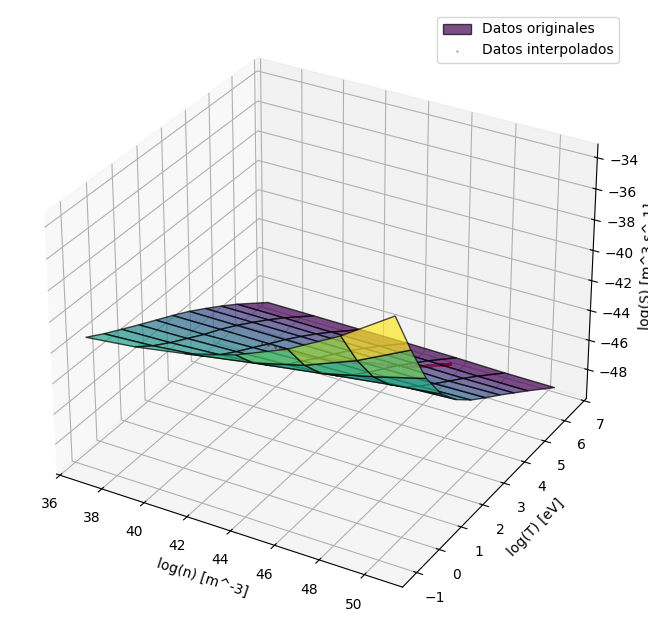

In [2]:
import numpy as np
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt

# Datos iniciales
n_data = np.array([1.E10, 1.E11, 1.E12, 1.E13, 1.E14, 1.E15, 1.E16])
n_data = n_data*1.0e6   # Convierte de cm^{-3} a m^{-3}
t_data = np.array([.345, .69, 1.38, 2.76, 5.52, 11.0, 22.1, 44.1, 88.0, 176.5, 706.])
# ------------------------------------------------------------------------------------------
s_data = np.zeros((len(n_data), len(t_data)), dtype=np.float64)
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
s_data[:, 0] = np.array([1.2e-12, 1.7e-12, 2.9e-12, 7.1e-12, 2.7e-11, 1.6e-10, 1.4e-9])
s_data[:, 1] = np.array([6.1e-13, 7.3e-13, 1.0e-12, 1.7e-12, 3.9e-12, 1.4e-11, 7.1e-11])
s_data[:, 2] = np.array([3.3e-13, 3.6e-13, 4.3e-13, 5.7e-13, 9.2e-13, 2.0e-12, 4.8e-12])
s_data[:, 3] = np.array([1.8e-13, 1.9e-13, 2.1e-13, 2.4e-13, 3.1e-13, 4.8e-13, 7.0e-13])
s_data[:, 4] = np.array([1.0e-13, 1.0e-13, 1.1e-13, 1.2e-13, 1.3e-13, 1.6e-13, 1.9e-13])
s_data[:, 5] = np.array([5.6e-14, 5.7e-14, 5.7e-14, 5.9e-14, 6.1e-14, 6.5e-14, 7.2e-14])
s_data[:, 6] = np.array([3.0e-14, 3.0e-14, 3.0e-14, 3.0e-14, 3.0e-14, 3.0e-14, 3.2e-14])
s_data[:, 7] = np.array([1.5e-14, 1.5e-14, 1.5e-14, 1.5e-14, 1.5e-14, 1.4e-14, 1.5e-14])
s_data[:, 8] = np.array([7.3e-15, 7.3e-15, 7.2e-15, 7.1e-15, 6.9e-15, 6.6e-15, 6.7e-15])
s_data[:, 9] = np.array([3.4e-15, 3.4e-15, 3.3e-15, 3.3e-15, 3.2e-15, 3.0e-15, 3.0e-15])
s_data[:, 10] = np.array([6.5e-16, 6.5e-16, 6.4e-16, 6.4e-16, 6.2e-16, 5.8e-16, 5.7e-16])
# ------------------------------------------------------------------------------------------
# Convertir data de cm^{3} s^{-1} to m^{3} s^{-1}
s_data = s_data * 1.0e-6

alpha_data=np.zeros((len(n_data), len(t_data)), dtype=np.float64)
alpha_data[:,0] = np.array([1.2e-12,1.7e-12,2.9e-12,7.1e-12,2.7e-11,1.6e-10,1.4e-9])
alpha_data[:,1] = np.array([6.1e-13,7.3e-13,1.0e-12,1.7e-12,3.9e-12,1.4e-11,7.1e-11])
alpha_data[:,2] = np.array([3.3e-13,3.6e-13,4.3e-13,5.7e-13,9.2e-13,2.0e-12,4.8e-12])
alpha_data[:,3] = np.array([1.8e-13,1.9e-13,2.1e-13,2.4e-13,3.1e-13,4.8e-13,7.0e-13])
alpha_data[:,4] = np.array([1.0e-13,1.0e-13,1.1e-13,1.2e-13,1.3e-13,1.6e-13,1.9e-13])
alpha_data[:,5] = np.array([5.6e-14,5.7e-14,5.7e-14,5.9e-14,6.1e-14,6.5e-14,7.2e-14])
alpha_data[:,6] = np.array([3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.0e-14,3.2e-14])
alpha_data[:,7] = np.array([1.5e-14,1.5e-14,1.5e-14,1.5e-14,1.5e-14,1.4e-14,1.5e-14])
alpha_data[:,8] = np.array([7.3e-15,7.3e-15,7.2e-15,7.1e-15,6.9e-15,6.6e-15,6.7e-15])
alpha_data[:,9] = np.array([3.4e-15,3.4e-15,3.3e-15,3.3e-15,3.2e-15,3.0e-15,3.0e-15])
alpha_data[:,10] = np.array([6.5e-16,6.5e-16,6.4e-16,6.4e-16,6.2e-16,5.8e-16,5.7e-16])
# ------------------------------------------------------------------------------------------
# Convertir data de cm^{3} s^{-1} to m^{3} s^{-1}
alpha_data = alpha_data*1.0e-6




# Se toman los logaritmos a los datos iniciales
log_n_data  = np.log(n_data)
log_t_data  = np.log(t_data)
log_s_data  = np.log(s_data)
log_alpha_data = np.log(alpha_data)

# Crear el interpolador
interpolator = RectBivariateSpline(log_n_data, log_t_data, log_s_data)
# ------------------------------------------------------------------------------------------
# Datos a Interpolar
# ------------------------------------------------------------------------------------------
# Se proveen los puntos donde se requiere la interpolación:
# Datos Inventados, pero tomando el mín y máx de cada uno
# n_to_interp = np.linspace(8.529762443780424e+17, 2.05813856787738e+20, 145)
# t_to_interp = np.linspace(9.34678840637207, 249.0390220287629, 145)
# Datos reales
n_to_interp = np.array([8.529762443780424e+17, 1.166678028854428e+18, 1.628554083661188e+18, 2.036659383130584e+18, 2.227688922516581e+18, 2.41467000241316e+18,  
                        2.471536926117491e+18, 2.474587257751732e+18, 2.53455740085265e+18,  2.78766324060693e+18,  3.052330238189064e+18, 3.376314044293282e+18,  
                        3.721903043739879e+18, 4.085641866071011e+18, 4.490563821868612e+18, 4.900116555792079e+18, 5.328639951013514e+18, 5.763411516283688e+18,  
                        6.258668445493425e+18, 6.884897529217857e+18, 7.532562105659867e+18, 8.245540842577419e+18, 8.978140610546499e+18, 9.764932881845998e+18,  
                        1.064510309244566e+19, 1.154562457754335e+19, 1.246612004855399e+19, 1.339219824189277e+19, 1.438086279128058e+19, 1.546895051172811e+19,  
                        1.658441456492423e+19, 1.77591632810782e+19,  1.894972647814284e+19, 2.012007708775305e+19, 2.125441644021092e+19, 2.23744660734298e+19,  
                        2.335807233084692e+19, 2.430258503689977e+19, 2.513778011485848e+19, 2.58486679791199e+19,  2.650697354927826e+19, 2.696688810884831e+19,  
                        2.736885360390719e+19, 2.767755514734248e+19, 2.78985161142427e+19,  2.807845973719836e+19, 2.821134945302991e+19, 2.832900993717576e+19,  
                        2.847840626093951e+19, 2.86658701262413e+19,  2.888495514205416e+19, 2.925228520795812e+19, 2.968227027287051e+19, 3.02519331399673e+19,  
                        3.094773278270731e+19, 3.173437902821304e+19, 3.27048806536534e+19,  3.376853862466836e+19, 3.492394055726716e+19, 3.615236348329313e+19,  
                        3.742302914930352e+19, 3.869119468231002e+19, 3.99577748280879e+19,  4.114727167111908e+19, 4.226633624201875e+19, 4.331837908428376e+19,  
                        4.426173988189363e+19, 4.512142801431744e+19, 4.597899743671135e+19, 4.684002055130495e+19, 4.77702241322341e+19,  4.893563197939785e+19,  
                        5.033180439327269e+19, 5.337742052312856e+19, 5.791871199181192e+19, 6.391859573325524e+19, 7.153223284268655e+19, 8.085473007409258e+19,  
                        8.79982692019479e+19,  9.307127112966591e+19, 9.830697941199636e+19, 1.071174126556021e+20, 1.202394332201221e+20, 1.309072041363556e+20,  
                        1.39150859397991e+20,  1.452980223823099e+20, 1.497733580469721e+20, 1.520364062762668e+20, 1.542557778545155e+20, 1.564299413692613e+20,  
                        1.58574779016409e+20,  1.60707354245483e+20,  1.628226997976754e+20, 1.648657845199277e+20, 1.668274043353586e+20, 1.687353998163313e+20,  
                        1.706122383620804e+20, 1.724443928750773e+20, 1.7420658108391e+20,   1.758827826988874e+20, 1.774878239179623e+20, 1.790223412895964e+20,  
                        1.804526508166777e+20, 1.817531365519266e+20, 1.828690366046071e+20, 1.839198092155461e+20, 1.849705773749886e+20, 1.860213579120357e+20,  
                        1.870721252762004e+20, 1.881229141639989e+20, 1.89173700285943e+20,  1.902244750275706e+20, 1.912752425715314e+20, 1.923260205225596e+20,  
                        1.933768010378759e+20, 1.943999010430651e+20, 1.953612264256265e+20, 1.962303432238066e+20, 1.970064594125254e+20, 1.975424922456411e+20,  
                        1.980360523630629e+20, 1.985296069031725e+20, 1.990231618600746e+20, 1.995167168038527e+20, 2.000102843650515e+20, 2.005032831018369e+20,  
                        2.00994699819287e+20,  2.014758731108977e+20, 2.019153318855567e+20, 2.021724053956685e+20, 2.024151617578905e+20, 2.026579244559852e+20,  
                        2.029006934973297e+20, 2.03143456894858e+20,  2.033862270378502e+20, 2.036289872884774e+20, 2.038717469980017e+20, 2.041145120381283e+20,  
                        2.04357282187226e+20,  2.046000388646562e+20, 2.048428113435099e+20, 2.050855777300937e+20, 2.053283381187215e+20, 2.055711077294206e+20,  
                        2.05813856787738e+20])
t_to_interp = np.array([9.34678840637207,     9.34678840637207,       9.34678840637207,       9.34678840637207,      9.34678840637207,    9.34678840637207,  
                        9.34678840637207,     9.34678840637207,       9.34678840637207,       9.34678840637207,      9.34678840637207,    9.34678840637207,  
                        9.34678840637207,     9.34678840637207,       9.34678840637207,       9.34678840637207,      9.34678840637207,    9.34678840637207,  
                        9.353203155001086,    9.373764910512076,      9.396642210011589,      9.550901584045615,     9.744629809912034,  10.01682774035412,  
                       10.41942009712586,    10.85043167558095,      11.30267208320391,      11.76084605210844,     12.24974725618487,   12.78601164914653,  
                       13.33531789914654,    13.89692424116531,      14.46181227367745,      15.00772384603196,     15.52499085599722,   16.03142479493324,  
                       16.46155264211707,    16.86981647052882,      17.22322479786068,      17.51513957277031,     17.7805713299966,    17.92301563922854,  
                       18.02953533334086,    18.0895014881993,       18.10810470581055,      18.10810470581055,     18.10810470581055,   18.10810470581055,  
                       18.10810470581055,    18.10810470581055,      18.1091793529839,       18.12300873972003,     18.14222841093713,   18.20386173910835,  
                       18.30656848699226,    18.44081540916582,      18.65152197654864,      18.90097003801679,     19.20510905753286,   19.55525068296369,  
                       19.93960698368101,    20.3674885456835,       20.82293073944747,      21.29202885203345,     21.77093977995033,   22.25529679264035,  
                       22.73730356825286,    23.21750177986635,      23.71196117904358,      24.21942507741451,     24.75868421143798,   25.38127615479738,  
                       26.08562981408275,    26.98923976005779,      28.07260860790412,      29.32705803311105,     30.76285644939662,   32.39069096405154,  
                       34.31278264239886,    36.50471401412148,      39.01950698141633,      41.95052863465907,     45.38358121853592,   48.89483031320226,  
                       52.47814567891719,    56.13221024260849,      59.85522399943026,      63.66947087443037,     67.30889626515891,   70.76738782792263,  
                       74.12886042388425,    77.48437862513902,      80.83153765158241,      84.14353032793755,     87.41589319964561,   90.66862540859704,  
                       93.91925609236498,    97.16686839705258,     100.4097654770221,      103.6468601572802,     106.8813194176123,   110.1153191780616,  
                      113.3486302592922,    116.5810976805658,      119.8123560740639,      123.0431883947535,     126.2740210794686,   129.5048540076918,  
                      132.7357154141247,    135.9665968426143,      139.1974716126723,      142.4283277992856,     145.6591656433962,   148.8900049012087,  
                      152.1208329717689,    155.3516514221974,      158.5824483330587,      161.8132068782287,     165.0439107844788,   168.2745193646292,  
                      171.5051044332725,    174.7356847540415,      177.9662626015533,      181.1968297890534,     184.4274078516455,   187.6579881699361,  
                      190.8885684376991,    194.1191480988735,      197.3497289582486,      200.5802971068594,     203.8108726892539,   207.041468607837,  
                      210.2720826893039,    213.5026878610286,      216.7332803796783,      219.9638631844349,     223.1944373076061,   226.4250054964035,  
                      229.6555730069151,    232.8861521772006,      236.1167232480625,      239.3472975044651,     242.5778734442176,   245.8084411693878,  
                      249.0390220287629])		
# Se toman los logaritmos a los datos a interpolar
log_n_to_interp = np.log(n_to_interp)
log_t_to_interp = np.log(t_to_interp)

# Evaluar el spline cúbico
log_s_interpolated = interpolator(log_n_to_interp, log_t_to_interp)
# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------
from mpl_toolkits.mplot3d import Axes3D

# Crear la grilla base para los datos originales
log_n_grid, log_t_grid = np.meshgrid(log_n_data, log_t_data, indexing="ij")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(log_n_grid, log_t_grid, log_s_data, cmap='viridis', alpha=0.7, label='Datos originales',edgecolor='k')
ax.scatter(log_n_to_interp, log_t_to_interp, log_s_interpolated, s=0.1, color='red', label='Datos interpolados')
# Etiquetas y título
ax.set_xlabel('log(n) [m^-3]')
ax.set_ylabel('log(T) [eV]')
ax.set_zlabel('log(S) [m^3 s^-1]')
# ax.set_title('Interpolación de datos con RectBivariateSpline')

# Leyenda
ax.legend(loc='best')

# Mostrar gráfico
plt.show()


# RBF interpolator

In [5]:
import numpy as np
from scipy.interpolate import RBFInterpolator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos iniciales
n_data = np.array([1.E10, 1.E11, 1.E12, 1.E13, 1.E14, 1.E15, 1.E16]) * 1.0e6  # cm^-3 to m^-3
t_data = np.array([0.345, 0.69, 1.38, 2.76, 5.52, 11.0, 22.1, 44.1, 88.0, 176.5, 706.])

s_data = np.zeros((len(n_data), len(t_data)), dtype=np.float64)
s_data[:, 0] = np.array([1.2e-12, 1.7e-12, 2.9e-12, 7.1e-12, 2.7e-11, 1.6e-10, 1.4e-9])
s_data[:, 1] = np.array([6.1e-13, 7.3e-13, 1.0e-12, 1.7e-12, 3.9e-12, 1.4e-11, 7.1e-11])
s_data[:, 2] = np.array([3.3e-13, 3.6e-13, 4.3e-13, 5.7e-13, 9.2e-13, 2.0e-12, 4.8e-12])
s_data[:, 3] = np.array([1.8e-13, 1.9e-13, 2.1e-13, 2.4e-13, 3.1e-13, 4.8e-13, 7.0e-13])
s_data[:, 4] = np.array([1.0e-13, 1.0e-13, 1.1e-13, 1.2e-13, 1.3e-13, 1.6e-13, 1.9e-13])
s_data[:, 5] = np.array([5.6e-14, 5.7e-14, 5.7e-14, 5.9e-14, 6.1e-14, 6.5e-14, 7.2e-14])
s_data[:, 6] = np.array([3.0e-14, 3.0e-14, 3.0e-14, 3.0e-14, 3.0e-14, 3.0e-14, 3.2e-14])
s_data[:, 7] = np.array([1.5e-14, 1.5e-14, 1.5e-14, 1.5e-14, 1.5e-14, 1.4e-14, 1.5e-14])
s_data[:, 8] = np.array([7.3e-15, 7.3e-15, 7.2e-15, 7.1e-15, 6.9e-15, 6.6e-15, 6.7e-15])
s_data[:, 9] = np.array([3.4e-15, 3.4e-15, 3.3e-15, 3.3e-15, 3.2e-15, 3.0e-15, 3.0e-15])
s_data[:, 10] = np.array([6.5e-16, 6.5e-16, 6.4e-16, 6.4e-16, 6.2e-16, 5.8e-16, 5.7e-16])

# Convertir a unidades de m^3 s^-1
s_data = s_data * 1.0e-6

# Tomar logaritmos
log_n_data = np.log(n_data)
log_t_data = np.log(t_data)
log_s_data = np.log(s_data)

# Crear los puntos de entrada para RBFInterpolator
log_n_grid, log_t_grid = np.meshgrid(log_n_data, log_t_data, indexing='ij')
points = np.column_stack((log_n_grid.ravel(), log_t_grid.ravel()))
values = log_s_data.ravel()

# Crear el interpolador RBF
rbf_interpolator = RBFInterpolator(points, values, kernel='cubic')

# Nuevos valores a interpolar
n_to_interp = np.linspace(8.529762443780424e+17, 2.05813856787738e+20, 145)
t_to_interp = np.linspace(9.34678840637207, 249.0390220287629, 145)
log_n_to_interp = np.log(n_to_interp)
log_t_to_interp = np.log(t_to_interp)

# Crear puntos para la interpolación
log_n_interp_grid, log_t_interp_grid = np.meshgrid(log_n_to_interp, log_t_to_interp, indexing='ij')
interp_points = np.column_stack((log_n_interp_grid.ravel(), log_t_interp_grid.ravel()))

# Interpolar
log_s_interpolated = rbf_interpolator(interp_points).reshape(log_n_interp_grid.shape)

# Visualización
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Grilla original
ax.plot_surface(log_n_grid, log_t_grid, log_s_data, cmap='viridis', alpha=0.7, edgecolor='k', label='Datos originales')
# Datos interpolados
ax.scatter(log_n_interp_grid, log_t_interp_grid, log_s_interpolated, s=0.1, color='red', label='Datos interpolados')

# Etiquetas
ax.set_xlabel('log(n) [m^-3]')
ax.set_ylabel('log(T) [eV]')
ax.set_zlabel('log(S) [m^3 s^-1]')
plt.show()


# Griddata

In [9]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos iniciales
n_data = np.array([1.E10, 1.E11, 1.E12, 1.E13, 1.E14, 1.E15, 1.E16]) * 1.0e6  # cm^-3 to m^-3
t_data = np.array([0.345, 0.69, 1.38, 2.76, 5.52, 11.0, 22.1, 44.1, 88.0, 176.5, 706.])

s_data = np.zeros((len(n_data), len(t_data)), dtype=np.float64)
s_data[:, 0] = np.array([1.2e-12, 1.7e-12, 2.9e-12, 7.1e-12, 2.7e-11, 1.6e-10, 1.4e-9])
s_data[:, 1] = np.array([6.1e-13, 7.3e-13, 1.0e-12, 1.7e-12, 3.9e-12, 1.4e-11, 7.1e-11])
s_data[:, 2] = np.array([3.3e-13, 3.6e-13, 4.3e-13, 5.7e-13, 9.2e-13, 2.0e-12, 4.8e-12])
s_data[:, 3] = np.array([1.8e-13, 1.9e-13, 2.1e-13, 2.4e-13, 3.1e-13, 4.8e-13, 7.0e-13])
s_data[:, 4] = np.array([1.0e-13, 1.0e-13, 1.1e-13, 1.2e-13, 1.3e-13, 1.6e-13, 1.9e-13])
s_data[:, 5] = np.array([5.6e-14, 5.7e-14, 5.7e-14, 5.9e-14, 6.1e-14, 6.5e-14, 7.2e-14])
s_data[:, 6] = np.array([3.0e-14, 3.0e-14, 3.0e-14, 3.0e-14, 3.0e-14, 3.0e-14, 3.2e-14])
s_data[:, 7] = np.array([1.5e-14, 1.5e-14, 1.5e-14, 1.5e-14, 1.5e-14, 1.4e-14, 1.5e-14])
s_data[:, 8] = np.array([7.3e-15, 7.3e-15, 7.2e-15, 7.1e-15, 6.9e-15, 6.6e-15, 6.7e-15])
s_data[:, 9] = np.array([3.4e-15, 3.4e-15, 3.3e-15, 3.3e-15, 3.2e-15, 3.0e-15, 3.0e-15])
s_data[:, 10] = np.array([6.5e-16, 6.5e-16, 6.4e-16, 6.4e-16, 6.2e-16, 5.8e-16, 5.7e-16])

# Convertir a unidades de m^3 s^-1
s_data = s_data * 1.0e-6

# Tomar logaritmos
log_n_data = np.log(n_data)
log_t_data = np.log(t_data)
log_s_data = np.log(s_data)

# Crear los puntos de entrada
log_n_grid, log_t_grid = np.meshgrid(log_n_data, log_t_data, indexing='ij')
points = np.column_stack((log_n_grid.ravel(), log_t_grid.ravel()))
values = log_s_data.ravel()

# Nuevos valores a interpolar
n_to_interp = np.linspace(8.529762443780424e+17, 2.05813856787738e+20, 145)
t_to_interp = np.linspace(9.34678840637207, 249.0390220287629, 145)
log_n_to_interp = np.log(n_to_interp)
log_t_to_interp = np.log(t_to_interp)

# Crear grilla de puntos para interpolación
log_n_interp_grid, log_t_interp_grid = np.meshgrid(log_n_to_interp, log_t_to_interp, indexing='ij')
interp_points = np.column_stack((log_n_interp_grid.ravel(), log_t_interp_grid.ravel()))

# Interpolación usando griddata
log_s_interpolated = griddata(points, values, interp_points, method='cubic').reshape(log_n_interp_grid.shape)

# Visualización
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Grilla original
ax.plot_surface(log_n_grid, log_t_grid, log_s_data, cmap='viridis', alpha=0.7, edgecolor='k')
# Datos interpolados
ax.scatter(log_n_interp_grid, log_t_interp_grid, log_s_interpolated, s=0.1, color='red')

# Etiquetas
ax.set_xlabel('log(n) [m^-3]')
ax.set_ylabel('log(T) [eV]')
ax.set_zlabel('log(S) [m^3 s^-1]')
plt.show()


# Pruebas

# RectBivariateSpline

Creación de grila, usando indexing 'ij'

In [62]:
print('#####################################')
print('######## Dimensiones Data ###########')
print('#####################################')
print(f'log_n_data.shape = {log_n_data.shape}')
print(f'log_t_data.shape = {log_t_data.shape}')
ln_n_grid, ln_t_grid = np.meshgrid(log_n_data, log_t_data,indexing='ij')
print('ln_t_grid, ln_n_grid = np.meshgrid(log_n_data, log_t_data,indexing=ij)')
print('#####################################')
print('######## Dimensiones Grilla #########')
print('#####################################')
print(f'ln_n_grid.shape = {ln_n_grid.shape}')
print(f'ln_t_grid.shape = {ln_t_grid.shape}')
print('#####################################')
print('######## Dimensiones s ##############')
print('#####################################')
print(f'ln_s_data.shape = {log_s_data.shape}')

#####################################
######## Dimensiones Data ###########
#####################################
log_n_data.shape = (7,)
log_t_data.shape = (11,)
ln_t_grid, ln_n_grid = np.meshgrid(log_n_data, log_t_data,indexing=ij)
#####################################
######## Dimensiones Grilla #########
#####################################
ln_n_grid.shape = (7, 11)
ln_t_grid.shape = (7, 11)
#####################################
######## Dimensiones s ##############
#####################################
ln_s_data.shape = (7, 11)


Creación del interpolador y uso

In [63]:
interpolatorRBSpline = RectBivariateSpline(log_n_data, log_t_data, log_s_data)
log_s_interpolated = interpolator(log_n_to_interp, log_t_to_interp, grid=False)

In [64]:
fig_RBSpline = plt.figure()
ax_RBSpline = fig_RBSpline.add_subplot(111, projection='3d')
ax_RBSpline.plot_surface(ln_n_grid,ln_t_grid,log_s_data,cmap='jet',alpha=0.3,edgecolor='k')
ax_RBSpline.scatter(ln_n_grid,ln_t_grid,log_s_data)
ax_RBSpline.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated,marker='1',color='black')
ax_RBSpline.scatter(ln_n_grid[0,0],ln_t_grid[0,0],log_s_data[0,0],color='red',s=9**2)
ax_RBSpline.scatter(ln_n_grid[-1,-1],ln_t_grid[-1,-1],log_s_data[-1,-1],color='green',s=9**2)
ax_RBSpline.set_xlabel('n')
ax_RBSpline.set_ylabel('t')
ax_RBSpline.set_zlabel('s')
plt.show()

# Comprobación de RectBivariateSpline

In [74]:
log_s_interpolated = interpolator(log_n_data, log_t_data, grid=True)

In [39]:
log_s_interpolated.shape

(7, 11)

In [40]:
log_s_data.shape

(7, 11)

In [41]:
delta = log_s_data.flatten()-log_s_interpolated.flatten()
delta2 = delta**2
# plt.hist(delta2,bins=20)
delta3 = (delta2/len(delta2))**0.5
plt.hist(delta3,bins=20)

(array([22.,  0.,  0.,  0.,  0., 33.,  0.,  0.,  0.,  0., 15.,  0.,  0.,
         0.,  0.,  5.,  0.,  0.,  0.,  2.]),
 array([0.00000000e+00, 1.61947720e-16, 3.23895439e-16, 4.85843159e-16,
        6.47790878e-16, 8.09738598e-16, 9.71686317e-16, 1.13363404e-15,
        1.29558176e-15, 1.45752948e-15, 1.61947720e-15, 1.78142491e-15,
        1.94337263e-15, 2.10532035e-15, 2.26726807e-15, 2.42921579e-15,
        2.59116351e-15, 2.75311123e-15, 2.91505895e-15, 3.07700667e-15,
        3.23895439e-15]),
 <BarContainer object of 20 artists>)

Error Absoluto

In [22]:
error_absoluto = abs(log_s_data - log_s_interpolated)
fig_RBSpline_err = plt.figure()
ax_RBSpline_err = fig_RBSpline_err.add_subplot(111, projection='3d')
ax_RBSpline_err.scatter(ln_n_grid,ln_t_grid,error_absoluto)
ax_RBSpline_err.set_xlabel('n')
ax_RBSpline_err.set_ylabel('t')
ax_RBSpline_err.set_zlabel('s')
plt.show()

In [15]:
plt.hist(error_absoluto,bins=20)

(array([[1., 0., 0., 0., 0., 3., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1.,
         0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 3., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 3., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
         0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 4., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1.],
        [2., 0., 0., 0., 0., 3., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 4., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 4., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 2.,
         0., 0., 0., 0.],
        [4., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [3., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0.],
        [3

Error Relativo

In [16]:
error_relativo = abs(log_s_data - log_s_interpolated)/abs(log_s_data)
fig_RBSpline_err = plt.figure()
ax_RBSpline_err = fig_RBSpline_err.add_subplot(111, projection='3d')
ax_RBSpline_err.scatter(ln_n_grid,ln_t_grid,error_relativo)
ax_RBSpline_err.set_xlabel('n')
ax_RBSpline_err.set_ylabel('t')
ax_RBSpline_err.set_zlabel('s')
plt.show()

Error cuadrático medio o Mean Squared Error - MSE

In [128]:
mse = np.mean((log_s_data - log_s_interpolated) ** 2)
mse

np.float64(1.1146502141304687e-28)

Mean Absolute Percentage Error o Error Porcentual Absoluto Medio - MAPE

In [130]:
mape = np.mean(np.abs((log_s_data - log_s_interpolated) / log_s_data)) * 100
print(f"MAPE: {mape}%")

MAPE: 1.830826045121157e-14%


# #########################xD

# Griddata

In [42]:
import numpy as np
from scipy.interpolate import griddata

# Convertir datos de la malla en un arreglo de puntos
points = np.array([ln_n_grid.ravel(), ln_t_grid.ravel()]).T  # Puntos de la malla
values = log_s_data.ravel()  # Valores de log_s_data aplanados

# Puntos donde interpolar
interp_points = np.array([log_n_to_interp, log_t_to_interp]).T

# Interpolación usando griddata
log_s_interpolated_griddata = griddata(points, values, interp_points, method='cubic')

In [60]:
fig_GridData = plt.figure()
ax_GridData = fig_GridData.add_subplot(111, projection='3d')
ax_GridData.plot_surface(ln_n_grid,ln_t_grid,log_s_data,cmap='jet',alpha=0.3,edgecolor='k')
# ax_GridData.scatter(ln_n_grid,ln_t_grid,log_s_data)
ax_GridData.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated_griddata,marker='1',color='black')
ax_GridData.set_xlabel('n')
ax_GridData.set_ylabel('t')
ax_GridData.set_zlabel('s')
plt.show()

# Comprobación de Griddata

In [77]:
log_s_interpolated_griddata_comprob = griddata(points, values, points, method='cubic')
log_s_interpolated_reshaped = log_s_interpolated_griddata_comprob.reshape(7, 11)

In [27]:
log_s_data.shape

(7, 11)

In [45]:
delta = log_s_data.flatten()-log_s_interpolated_reshaped.flatten()
delta2 = delta**2
# plt.hist(delta2,bins=20)
delta3 = (delta2/len(delta2))**0.5
plt.hist(delta3,bins=20)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 77.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <BarContainer object of 20 artists>)

In [46]:
error_absoluto = abs(log_s_data - log_s_interpolated_reshaped)
fig_GridData_err = plt.figure()
ax_GridData_err = fig_GridData_err.add_subplot(111, projection='3d')
ax_GridData_err.scatter(ln_n_grid,ln_t_grid,error_absoluto)
ax_GridData_err.set_xlabel('n')
ax_GridData_err.set_ylabel('t')
ax_GridData_err.set_zlabel('s')
plt.show()

In [47]:
error_relativo = abs(log_s_data - log_s_interpolated_reshaped)/abs(log_s_data)
fig_GridData_err = plt.figure()
ax_GridData_err = fig_GridData_err.add_subplot(111, projection='3d')
ax_GridData_err.scatter(ln_n_grid,ln_t_grid,error_relativo)
ax_GridData_err.set_xlabel('n')
ax_GridData_err.set_ylabel('t')
ax_GridData_err.set_zlabel('s')
plt.show()

In [48]:
mse = np.mean((log_s_data - log_s_interpolated_reshaped) ** 2)
mse

np.float64(0.0)

In [49]:
mape = np.mean(np.abs((log_s_data - log_s_interpolated_reshaped) / log_s_data)) * 100
print(f"MAPE: {mape}%")

MAPE: 0.0%


# RBF Interpolator

In [50]:
from scipy.interpolate import RBFInterpolator

# Convertir datos de la malla en un arreglo de puntos
points = np.array([ln_n_grid.ravel(), ln_t_grid.ravel()]).T  # Puntos de la malla
values = log_s_data.ravel()  # Valores de log_s_data aplanados

# Crear el interpolador RBF
rbf_interpolator = RBFInterpolator(points, values, kernel='linear')  # Puedes probar otros kernels como 'multiquadric' o 'cubic'

# Interpolar en los puntos deseados
interp_points = np.array([log_n_to_interp, log_t_to_interp]).T
log_s_interpolated_rbf = rbf_interpolator(interp_points)


In [58]:
fig_GridData = plt.figure()
ax_GridData = fig_GridData.add_subplot(111, projection='3d')
ax_GridData.plot_surface(ln_n_grid,ln_t_grid,log_s_data,cmap='jet',alpha=0.3,edgecolor='k')
# ax_GridData.scatter(ln_n_grid,ln_t_grid,log_s_data)
ax_GridData.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated_rbf,marker='1',color='black')
ax_GridData.set_xlabel('n')
ax_GridData.set_ylabel('t')
ax_GridData.set_zlabel('s')
plt.show()

# Comprobación de RBF Interpolator

In [52]:
log_s_interpolated_rbf_on_points = rbf_interpolator(points)
log_s_interpolated_rbf_reshaped = log_s_interpolated_rbf_on_points.reshape(7, 11)

In [53]:
delta = log_s_data.flatten()-log_s_interpolated_rbf_reshaped.flatten()
delta2 = delta**2
# plt.hist(delta2,bins=20)
delta3 = (delta2/len(delta2))**0.5
plt.hist(delta3,bins=20)

(array([16.,  0.,  0.,  0., 27.,  0.,  0.,  0., 14.,  0.,  0.,  0., 11.,
         0.,  0.,  0.,  6.,  0.,  0.,  3.]),
 array([0.00000000e+00, 2.02434649e-16, 4.04869299e-16, 6.07303948e-16,
        8.09738598e-16, 1.01217325e-15, 1.21460790e-15, 1.41704255e-15,
        1.61947720e-15, 1.82191184e-15, 2.02434649e-15, 2.22678114e-15,
        2.42921579e-15, 2.63165044e-15, 2.83408509e-15, 3.03651974e-15,
        3.23895439e-15, 3.44138904e-15, 3.64382369e-15, 3.84625834e-15,
        4.04869299e-15]),
 <BarContainer object of 20 artists>)

In [59]:
error_absoluto = abs(log_s_data - log_s_interpolated_rbf_reshaped)
fig_RBF_err = plt.figure()
ax_RBF_err = fig_RBF_err.add_subplot(111, projection='3d')
ax_RBF_err.scatter(ln_n_grid,ln_t_grid,error_absoluto)
ax_RBF_err.set_xlabel('n')
ax_RBF_err.set_ylabel('t')
ax_RBF_err.set_zlabel('s')
plt.show()

In [167]:
error_relativo = abs(log_s_data - log_s_interpolated_rbf_reshaped)/abs(log_s_data)
fig_RBF_err = plt.figure()
ax_RBF_err = fig_RBF_err.add_subplot(111, projection='3d')
ax_RBF_err.scatter(ln_n_grid,ln_t_grid,error_relativo)
ax_RBF_err.set_xlabel('n')
ax_RBF_err.set_ylabel('t')
ax_RBF_err.set_zlabel('s')
plt.show()

In [168]:
mse = np.mean((log_s_data - log_s_interpolated_rbf_reshaped) ** 2)
mse

np.float64(2.3145383858120907e-28)

In [169]:
mape = np.mean(np.abs((log_s_data - log_s_interpolated_rbf_reshaped) / log_s_data)) * 100
print(f"MAPE: {mape}%")

MAPE: 2.6813951422509597e-14%


In [67]:
log_s_interpolated.shape

(145,)

In [68]:
log_s_interpolated_griddata.shape

(145,)

In [69]:
log_s_interpolated_rbf_reshaped.shape

(7, 11)

# Comparación Superficies

In [71]:
fig_RBSpline = plt.figure()
ax_RBSpline = fig_RBSpline.add_subplot(111, projection='3d')
ax_RBSpline.plot_surface(ln_n_grid,ln_t_grid,log_s_data,cmap='jet',alpha=0.3,edgecolor='k')
ax_RBSpline.scatter(ln_n_grid,ln_t_grid,log_s_data)
ax_RBSpline.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated,marker='1',color='red')
ax_RBSpline.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated_griddata,marker='1',color='green')
ax_RBSpline.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated_rbf,marker='1',color='violet')
# ax_RBSpline.scatter(ln_n_grid[0,0],ln_t_grid[0,0],log_s_data[0,0],color='red',s=9**2)
# ax_RBSpline.scatter(ln_n_grid[-1,-1],ln_t_grid[-1,-1],log_s_data[-1,-1],color='green',s=9**2)
ax_RBSpline.set_xlabel('n')
ax_RBSpline.set_ylabel('t')
ax_RBSpline.set_zlabel('s')
plt.show()

In [83]:
fig_RBSpline = plt.figure()
ax_RBSpline = fig_RBSpline.add_subplot(111, projection='3d')
ax_RBSpline.plot_surface(ln_n_grid,ln_t_grid,log_s_data,cmap='jet',alpha=0.3,edgecolor='k',label='data')
ax_RBSpline.plot_surface(ln_n_grid,ln_t_grid,log_s_interpolated,cmap='viridis',alpha=0.3,edgecolor='k',label='RectBivariateSpline')
ax_RBSpline.plot_surface(ln_n_grid,ln_t_grid,log_s_interpolated_reshaped,cmap='plasma',alpha=0.3,edgecolor='k',label='Griddata')
ax_RBSpline.plot_surface(ln_n_grid,ln_t_grid,log_s_interpolated_rbf_reshaped,cmap='Blues',alpha=0.3,edgecolor='k',label='RBF')
ax_RBSpline.scatter(ln_n_grid,ln_t_grid,log_s_data)


# ax_RBSpline.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated,marker='1',color='red')
# ax_RBSpline.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated_griddata,marker='1',color='green')
# ax_RBSpline.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated_rbf,marker='1',color='violet')
# ax_RBSpline.scatter(ln_n_grid[0,0],ln_t_grid[0,0],log_s_data[0,0],color='red',s=9**2)
# ax_RBSpline.scatter(ln_n_grid[-1,-1],ln_t_grid[-1,-1],log_s_data[-1,-1],color='green',s=9**2)
ax_RBSpline.set_xlabel('n')
ax_RBSpline.set_ylabel('t')
ax_RBSpline.set_zlabel('s')
plt.show()

# Alpha

In [179]:
log_alpha_data
interpolatorRBSpline = RectBivariateSpline(log_n_data, log_t_data, log_alpha_data)
log_s_interpolated = interpolator(log_n_to_interp, log_t_to_interp, grid=False)
fig_RBSpline = plt.figure()
ax_RBSpline = fig_RBSpline.add_subplot(111, projection='3d')
ax_RBSpline.plot_surface(ln_n_grid,ln_t_grid,log_alpha_data,cmap='jet',alpha=0.1,edgecolor='k')
ax_RBSpline.plot_surface(ln_n_grid,ln_t_grid,log_s_data,cmap='jet',alpha=0.1,edgecolor='k')
# ax_RBSpline.scatter(ln_n_grid,ln_t_grid,log_alpha_data)
ax_RBSpline.scatter(log_n_to_interp, log_t_to_interp,log_s_interpolated,marker='1',color='black')
# ax_RBSpline.scatter(ln_n_grid[0,0],ln_t_grid[0,0],log_alpha_data[0,0],color='red',s=9**2)
# ax_RBSpline.scatter(ln_n_grid[-1,-1],ln_t_grid[-1,-1],log_alpha_data[-1,-1],color='green',s=9**2)
ax_RBSpline.set_xlabel('n')
ax_RBSpline.set_ylabel('t')
ax_RBSpline.set_zlabel('s')
plt.show()

# Uso del Meshgrid

In [65]:
x = np.arange(2,5)
y = np.arange(101,110)
z = np.outer(x,y)
print(x,x.shape)
print(y,y.shape)
print(z,z.shape)

[2 3 4] (3,)
[101 102 103 104 105 106 107 108 109] (9,)
[[202 204 206 208 210 212 214 216 218]
 [303 306 309 312 315 318 321 324 327]
 [404 408 412 416 420 424 428 432 436]] (3, 9)


In [107]:
x_grid,y_grid = np.meshgrid(x,y,indexing='ij')
print(x_grid,x_grid.shape)
print('#')
print(y_grid,y_grid.shape)

[[2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4]] (3, 9)
#
[[101 102 103 104 105 106 107 108 109]
 [101 102 103 104 105 106 107 108 109]
 [101 102 103 104 105 106 107 108 109]] (3, 9)


In [68]:
fig_xy = plt.figure()
ax_xy = fig_xy.add_subplot(111,projection='3d')
ax_xy.scatter(x_grid,y_grid,z)
ax_xy.set_xlabel('x')
ax_xy.set_ylabel('y')
plt.show()